In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
train,test=train_test_split(df,test_size=0.2,random_state=0)

In [4]:
train

,age,sex,bmi,children,smoker,region,expenses
621,37,male,34.1,4,yes,southwest,40182.25
194,18,male,34.4,0,no,southeast,1137.47
240,23,female,36.7,2,yes,northeast,38511.63
1168,32,male,35.2,2,no,southwest,4670.64
1192,58,female,32.4,1,no,northeast,13019.16
...,...,...,...,...,...,...,...
763,27,male,26.0,0,no,northeast,3070.81
835,42,male,36.0,2,no,southeast,7160.33
1216,40,male,25.1,0,no,southeast,5415.66
559,19,male,35.5,0,no,northwest,1646.43


In [5]:
test

,age,sex,bmi,children,smoker,region,expenses
578,52,male,30.2,1,no,southwest,9724.53
610,47,female,29.4,1,no,southeast,8547.69
569,48,male,40.6,2,yes,northwest,45702.02
1034,61,male,38.4,0,no,northwest,12950.07
198,51,female,18.1,0,no,northwest,9644.25
...,...,...,...,...,...,...,...
1084,62,female,30.5,2,no,northwest,15019.76
726,41,male,28.4,1,no,northwest,6664.69
1132,57,male,40.3,0,no,northeast,20709.02
725,30,female,39.1,3,yes,southeast,40932.43


In [6]:
train_label=train['expenses']
train.drop(['expenses'],axis=1,inplace=True)
train

,age,sex,bmi,children,smoker,region
621,37,male,34.1,4,yes,southwest
194,18,male,34.4,0,no,southeast
240,23,female,36.7,2,yes,northeast
1168,32,male,35.2,2,no,southwest
1192,58,female,32.4,1,no,northeast
...,...,...,...,...,...,...
763,27,male,26.0,0,no,northeast
835,42,male,36.0,2,no,southeast
1216,40,male,25.1,0,no,southeast
559,19,male,35.5,0,no,northwest


In [7]:
test_label=test['expenses']
test.drop(['expenses'],axis=1,inplace=True)

In [8]:
train['sex']=np.where(train['sex']=='male',1,0)
train['smoker']=np.where(train['smoker']=='yes',1,0)
test['sex']=np.where(test['sex']=='male',1,0)
test['smoker']=np.where(test['smoker']=='yes',1,0)


In [9]:
train_dummies=pd.get_dummies(train['region'])

In [10]:
train=pd.concat([train,train_dummies],axis='columns')
train.drop(['region'],axis=1,inplace=True)

In [11]:
test_dummies=pd.get_dummies(test['region'])
test=pd.concat([test,test_dummies],axis="columns")  
test.drop(['region'],axis=1,inplace=True)

In [12]:
test

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
578,52,1,30.2,1,0,False,False,False,True
610,47,0,29.4,1,0,False,False,True,False
569,48,1,40.6,2,1,False,True,False,False
1034,61,1,38.4,0,0,False,True,False,False
198,51,0,18.1,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1084,62,0,30.5,2,0,False,True,False,False
726,41,1,28.4,1,0,False,True,False,False
1132,57,1,40.3,0,0,True,False,False,False
725,30,0,39.1,3,1,False,False,True,False


In [13]:
normalizer=layers.Normalization(axis=1)

In [14]:
linear_model=keras.Sequential(
    [
        layers.Input(shape=len(train.keys())),
        normalizer,
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ]
)

In [15]:
linear_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse'])

In [16]:
train=np.asarray(train).astype(np.float32)

In [17]:
test=np.asarray(test).astype(np.float32)

In [24]:
class epochcall(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print()
            print('Epoch: {:d}, '.format(epoch), end='')
            for name, value in sorted(logs.items()):
                print('{}:{:0.4f}'.format(name, value), end=', ')
            print()
        print('=', end='')

In [19]:
history = linear_model.fit(train, train_label, epochs=10000,
    verbose=0, callbacks=[epochcall()])




Epoch: 0, loss:317016064.0000, mae:13179.1016, mse:317016064.0000, 
....................................................................................................
Epoch: 100, loss:117036384.0000, mae:8620.6523, mse:117036384.0000, 
....................................................................................................
Epoch: 200, loss:47427328.0000, mae:4921.2827, mse:47427328.0000, 
....................................................................................................
Epoch: 300, loss:35213436.0000, mae:3842.7312, mse:35213436.0000, 
....................................................................................................
Epoch: 400, loss:32004572.0000, mae:3672.1553, mse:32004572.0000, 
....................................................................................................
Epoch: 500, loss:30060214.0000, mae:3454.9412, mse:30060214.0000, 
.......................................................................................

In [93]:
result = linear_model.evaluate(test, test_label, verbose=2)
print(result)

9/9 - 0s - loss: 17602646.0000 - mae: 2621.0757 - mse: 17602646.0000 - 271ms/epoch - 30ms/step
[17602646.0, 2621.07568359375, 17602646.0]


9/9 - 0s - loss: 17602646.0000 - mae: 2621.0757 - mse: 17602646.0000 - 48ms/epoch - 5ms/step
Testing set Mean Abs Error: 2621.08 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


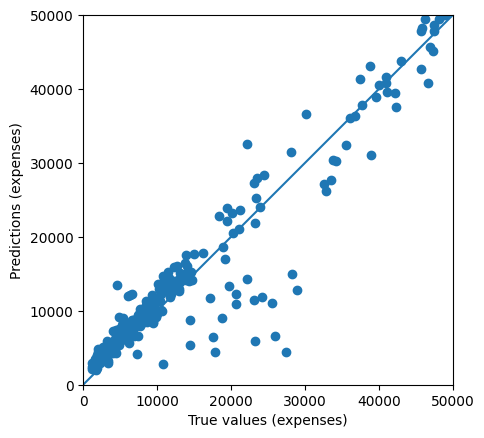

In [94]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = linear_model.evaluate(test, test_label, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = linear_model.predict(test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)


In [41]:
df=pd.read_csv('insurance.csv')
features=df.keys().to_list()
features.remove('region')
features.remove('expenses')
features.extend(['southeast','southwest','northeast','northwest'])
features

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'southeast',
 'southwest',
 'northeast',
 'northwest']

In [63]:
predict=[22,1,7.6,2,0,0,1,0,0,0]
predict={
    'age':[22],
    'sex':[1],
    'bmi':[7.6],
    'children':[2],
    'Smoker':[0],
    'southeast':[0],
    'southwest':[0],
    'northwest':[1],
    'northeast':[0],

}
# for feature in features:
#     val = input(feature + ": ")
#     predict[feature] = [float(val)]  
predict=np.array([[18, 1, 33, 1, 0, 1, 0, 0,0]])
predict = linear_model.predict(predict)
predict

1/1 [==============================] - 0s 27ms/step


array([[4503.4956]], dtype=float32)

In [89]:
import random
import csv

# Function to generate random data for the CSV
def generate_data():
    ages = [random.randint(18, 70) for _ in range(1000000)]
    sexes = [random.choice([0, 1]) for _ in range(1000000)]
    bmis = [round(random.uniform(18.5, 40.0), 2) for _ in range(1000000)]
    children = [random.randint(0, 5) for _ in range(1000000)]
    smokers = [random.choice([0, 1]) for _ in range(1000000)]
    regions = ['southwest', 'southeast', 'northeast', 'northwest']
    region_list = [random.choice(regions) for _ in range(1000000)]
    expenses = [round(random.uniform(1000, 20000), 2) for _ in range(1000000)]

    data = zip(ages, sexes, bmis, children, smokers, region_list, expenses)
    return data

# Generate data and write to CSV file
with open('generated_data_with_expenses.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'])  # Write headers
    data = generate_data()
    writer.writerows(data)

print("CSV file generated with more than 1000000 rows including expenses.")


CSV file generated with more than 1000000 rows including expenses.
